In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
science = './data/science.csv'
df = pd.read_csv(science)
df

,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
7,2006,23584,7491
8,2007,25525,8161
9,2008,27731,8578


In [5]:
# And we have all the x value data here: 
xs = df['US science spending']

# And we have all the actual y value data here:
actual = df['Suicides']

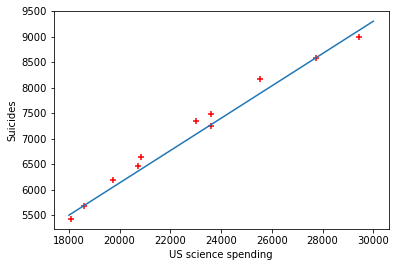

In [6]:
plt.xlabel('US science spending')
plt.ylabel('Suicides')
plt.scatter(xs, actual, color='red', marker='+' )
plt.plot([18000, 30000], [5500, 9300])

In [7]:
import sklearn.linear_model
sklearn.linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
import numpy as np
xs_reshape = np.array(xs).reshape(11, 1)
xs_reshape

array([[18079],
       [18594],
       [19753],
       [20734],
       [20831],
       [23029],
       [23597],
       [23584],
       [25525],
       [27731],
       [29449]])

In [9]:
# creating mode
model = sklearn.linear_model.LinearRegression()

# Fitting a model with x and y value
model.fit(xs_reshape, actual)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
model.coef_

array([ 0.31270829])

In [11]:
model.intercept_

-21.489696197675585

In [12]:
#You can now use the model to predict more accurately

predicted = model.predict(xs_reshape)
predicted

array([ 5631.96351095,  5793.00828122,  6155.4371914 ,  6462.20402564,
        6492.53672994,  7179.86955528,  7357.48786501,  7353.42265722,
        7960.38945157,  8650.22394324,  9187.45678853])

In [13]:
model.predict(23000)

array([ 7170.80101482])

In [14]:
sklearn.metrics.mean_absolute_error(actual, predicted)

123.51716628982508

In [15]:
# reusing the predict model

In [16]:
d = pd.read_csv('./data/spending.csv')
d

,Year,US science spending
0,2010,17079
1,2011,17594
2,2012,20753
3,2013,21734
4,2014,21831
5,2015,24029
6,2016,24597
7,2017,24584
8,2018,26525


In [17]:
xs_ = d['US science spending']
d_reshape = np.array(xs_).reshape(9, 1)
model_pred = model.predict(d_reshape)
model_pred

array([ 5319.25521917,  5480.29998944,  6468.14548318,  6774.91231742,
        6805.24502172,  7492.57784706,  7670.1961568 ,  7666.130949  ,
        8273.09774335])

In [18]:
# save the prediction
d['Suicides'] = model_pred
d.to_csv('predict_suicide.csv',index=False)

In [19]:
pr_df = pd.read_csv('./data/predict_suicide.csv')
pr_df


,Year,US science spending,Suicides
0,2010,17079,5319.255219
1,2011,17594,5480.299989
2,2012,20753,6468.145483
3,2013,21734,6774.912317
4,2014,21831,6805.245022
5,2015,24029,7492.577847
6,2016,24597,7670.196157
7,2017,24584,7666.130949
8,2018,26525,8273.097743


In [20]:
# And we have all the x value data here: 
xs = pr_df['US science spending']
xs_reshape = np.array(xs).reshape(9, 1)

# And we have all the actual y value data here:
actual = pr_df['Suicides']


In [21]:
xs_reshape

array([[17079],
       [17594],
       [20753],
       [21734],
       [21831],
       [24029],
       [24597],
       [24584],
       [26525]])

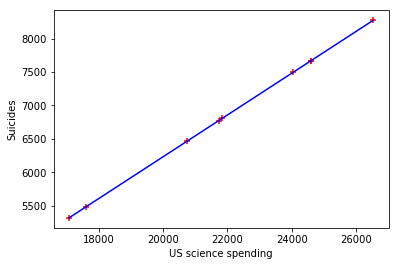

In [22]:
plt.xlabel('US science spending')
plt.ylabel('Suicides')
plt.scatter(xs, actual, color='red', marker='+' )
plt.plot(xs_reshape,model.predict(xs_reshape), color='blue')

### 2. Linear regression multivariate

In [23]:
home = './data/homeprices.csv'
home_df = pd.read_csv(home)
home_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [24]:
# fill NaN with median
import math
median_bedrooms = math.floor(home_df.bedrooms.median())
median_bedrooms

4

In [25]:
home_df.bedrooms = home_df.bedrooms.fillna(median_bedrooms)
home_df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [26]:
xs = home_df[['area', 'bedrooms', 'age']]
actual_price = home_df['price']

In [27]:
reg = sklearn.linear_model.LinearRegression()
# reg.fit(home_df.drop('price',axis='columns'),home_df.price)
reg.fit(xs,actual_price )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
reg.coef_

array([   112.06244194,  23388.88007794,  -3231.71790863])

In [29]:
reg.intercept_

221323.00186540378

In [30]:
#Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old
reg.predict([[3000, 3, 40]])

array([ 498408.25158031])

In [31]:
# how does it give us the price of home with 3000 sqr ft area,
#3 bedrooms, 40 year old
112.06244194*3000 +  23388.88007794*3 + -3231.71790863*40 +221323.00186540378

498408.2515740238

In [32]:
pred = reg.predict(xs)
pred

array([ 518217.63297611,  602590.07937407,  615307.4140366 ,
        597962.89583192,  760663.42675457,  795258.55102673])

In [33]:
# Exercise
from word2number import w2n
import math

In [34]:
hiring_df = pd.read_csv('./data/hiring.csv')
hiring_df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [35]:
hiring_df.experience = hiring_df.experience.fillna('zero')

median_test_score = math.floor(hiring_df['test_score(out of 10)'] .median())
hiring_df['test_score(out of 10)'] = hiring_df['test_score(out of 10)'].fillna(median_test_score)
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [36]:
hiring_df.experience = hiring_df.experience.apply(w2n.word_to_num)
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [37]:
xs = hiring_df[['experience','test_score(out of 10)', 'interview_score(out of 10)']]

actual_salary = hiring_df['salary($)']

In [38]:
reg = sklearn.linear_model.LinearRegression()
reg.fit(xs,actual_salary )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#Find salary for a candidate with 0 year experience,test score 10, interview score 10
pred = reg.predict([[0,10,10]])
pred

array([ 58246.72489083])

In [40]:
# use the prediction
candidate_df = pd.read_csv('./data/candidates.csv')
candidate_df.experience = candidate_df.experience.apply(w2n.word_to_num)

candidate_df

,experience,test_score(out of 10),interview_score(out of 10)
0,1,8,9
1,9,8,6
2,5,6,7
3,2,10,10
4,8,9,6
5,3,7,10
6,10,5,7
7,11,7,8
8,12,8,9


In [41]:
xs = candidate_df[['experience','test_score(out of 10)', 'interview_score(out of 10)']]
pred = reg.predict(xs)
pred

array([ 55163.02765648,  71050.94614265,  58312.95487627,  63872.63464338,
        70083.69723435,  61148.47161572,  70532.02328967,  79241.63027656,
        86105.53129549])

In [42]:
candidate_df['salary($)']= pred
candidate_df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,1,8,9,55163.027656
1,9,8,6,71050.946143
2,5,6,7,58312.954876
3,2,10,10,63872.634643
4,8,9,6,70083.697234
5,3,7,10,61148.471616
6,10,5,7,70532.023290
7,11,7,8,79241.630277
8,12,8,9,86105.531295


In [43]:
candidate_df.to_csv('./data/predict_salary.csv',index=False)

In [45]:
predict_salary = pd.read_csv('./data/predict_salary.csv')
predict_salary

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,1,8,9,55163.027656
1,9,8,6,71050.946143
2,5,6,7,58312.954876
3,2,10,10,63872.634643
4,8,9,6,70083.697234
5,3,7,10,61148.471616
6,10,5,7,70532.023290
7,11,7,8,79241.630277
8,12,8,9,86105.531295
